In [61]:
import seaborn as sns
import pandas as pd
import numpy as np
import itertools
import sys

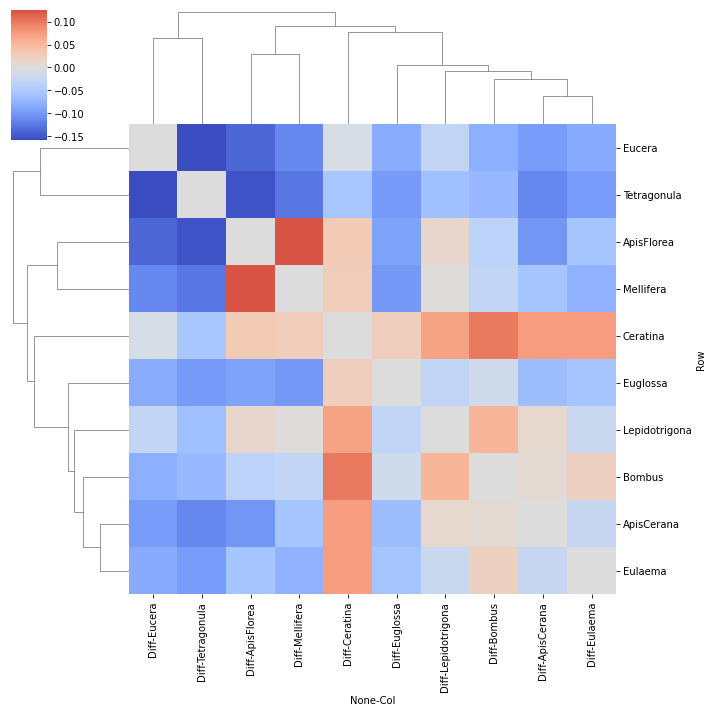

In [64]:
# Parse total nested lists.

contigDic = {}
contigDic['Insect'] = {'Mellifera': 926, 'Ceratina': 373, 'Tetragonula': 11, 'Bombus': 224, 'ApisCerana': 326, 'Euglossa': 92, 'Eulaema': 149, 'Eucera': 41, 'ApisFlorea': 584, 'Lepidotrigona': 354}
contigDic['Env'] = {'Mellifera': 105, 'Ceratina': 198, 'Tetragonula': 20, 'Bombus': 115, 'ApisCerana': 89, 'Euglossa': 77, 'Eulaema': 81, 'Eucera': 35, 'ApisFlorea': 77, 'Lepidotrigona': 188}


# Apidae

apidaeDic = {}
# Apidae, env (345 shared contigs)
with open('../networks/Apidae_env.csv') as f:
    for line in f:
        tax1 = line.strip().split(',')[0]
        tax2 = line.strip().split(',')[1]
        count = int(line.strip().split(',')[2])
        contigCount = contigDic['Env'][tax1] + contigDic['Env'][tax2]
        fw = tax1 + '_' + tax2
        rv = tax2 + '_' + tax1
        if fw not in apidaeDic and rv not in apidaeDic:
            apidaeDic[fw] = (count / contigCount)
            apidaeDic[rv] = (count / contigCount)
        elif fw in apidaeDic and rv in apidaeDic:
            apidaeDic[fw] += (count / contigCount)
            apidaeDic[rv] += (count / contigCount)
        else:
            print("Problem parsing. exit.")
            break

apidaeInsectDic = {}
# Apidae, Insect (708 shared contigs)
with open('../networks/Apidae_insect.csv') as f:
    for line in f:
        tax1 = line.strip().split(',')[0]
        tax2 = line.strip().split(',')[1]
        count = int(line.strip().split(',')[2])
        contigCount = contigDic['Insect'][tax1] + contigDic['Insect'][tax2]
        fw = tax1 + '_' + tax2
        rv = tax2 + '_' + tax1
        if fw not in apidaeInsectDic and rv not in apidaeInsectDic:
            apidaeInsectDic[fw] = (count / contigCount)
            apidaeInsectDic[rv] = (count / contigCount)
        elif fw in apidaeInsectDic and rv in apidaeInsectDic:
            apidaeInsectDic[fw] += (count / contigCount)
            apidaeInsectDic[rv] += (count / contigCount)
        else:
            print("Problem parsing. exit.")
            break

if len(apidaeDic) != len(apidaeInsectDic):
    print("Dics not equally long.")

# Take the combinations
uniques = []
for i in apidaeDic:
    if i.split('_')[0] not in uniques:
        uniques.append(i.split('_')[0])
    if i.split('_')[1] not in uniques:
        uniques.append(i.split('_')[1])

list(itertools.combinations(uniques, 2))
diffLis = []
for comb in list(itertools.combinations(uniques, 2)):
    row = comb[0]
    col = comb[1]
    fw = row + '_' + col
    rv = col + '_' + row
    env = apidaeDic[fw]
    ins = apidaeInsectDic[fw]
    diffLis.append([row,col,ins-env])
    diffLis.append([col,row,ins-env])

apidaeDF = pd.DataFrame(diffLis)
apidaeDF.columns = ['Row', 'Col','Diff']
apidaeDF = apidaeDF.pivot(index='Row', columns='Col')
apidaeDF = apidaeDF.fillna(0)
sns.clustermap(apidaeDF, center= 0, cmap= 'coolwarm')



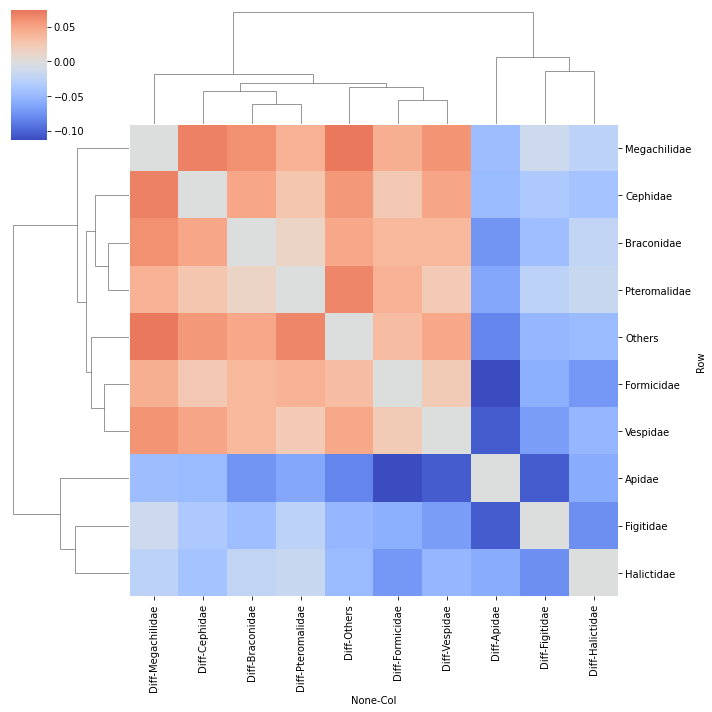

In [65]:
# Hymenoptera 

# Create a dic with # contigs in env and insect that exceed our preimposed threshold.

contigDic = {}
contigDic['Insect'] = {'Apidae': 886, 'Formicidae': 142, 'Vespidae': 164, 'Halictidae': 9, 'Braconidae': 396, 'Megachilidae': 217, 'Pteromalidae': 324, 'Cephidae': 250, 'Figitidae': 96, 'Others': 221}
contigDic['Env'] = {'Apidae': 108, 'Formicidae': 71, 'Vespidae': 84, 'Halictidae': 10, 'Braconidae': 159, 'Megachilidae': 145, 'Pteromalidae': 200, 'Cephidae': 155, 'Figitidae': 47, 'Others': 98}

envDic = {}
# Apidae, env (345 shared contigs)
with open('../networks/Hymenoptera_env.csv') as f:
    for line in f:
        tax1 = line.strip().split(',')[0]
        tax2 = line.strip().split(',')[1]
        contigCount = contigDic['Env'][tax1] + contigDic['Env'][tax2]
        count = int(line.strip().split(',')[2])
        fw = tax1 + '_' + tax2
        rv = tax2 + '_' + tax1
        if fw not in envDic and rv not in envDic:
            envDic[fw] = (count / contigCount)
            envDic[rv] = (count / contigCount)
        elif fw in apidaeDic and rv in envDic:
            envDic[fw] += (count / contigCount)
            envDic[rv] += (count / contigCount)
        else:
            print("Problem parsing. exit.")
            break

insDic = {}
# Apidae, Insect (708 shared contigs)
with open('../networks/Hymenoptera_insect.csv') as f:
    for line in f:
        tax1 = line.strip().split(',')[0]
        tax2 = line.strip().split(',')[1]
        contigCount = contigDic['Insect'][tax1] + contigDic['Insect'][tax2]
        count = int(line.strip().split(',')[2])
        fw = tax1 + '_' + tax2
        rv = tax2 + '_' + tax1
        if fw not in insDic and rv not in insDic:
            insDic[fw] = (count / contigCount)
            insDic[rv] = (count / contigCount)
        elif fw in insDic and rv in insDic:
            insDic[fw] += (count / contigCount)
            insDic[rv] += (count / contigCount)
        else:
            print("Problem parsing. exit.")
            break

if len(envDic) != len(insDic):
    print("Dics not equally long.")

# Take the combinations
uniques = []
for i in envDic:
    if i.split('_')[0] not in uniques:
        uniques.append(i.split('_')[0])
    if i.split('_')[1] not in uniques:
        uniques.append(i.split('_')[1])

list(itertools.combinations(uniques, 2))
diffLis = []
for comb in list(itertools.combinations(uniques, 2)):
    row = comb[0]
    col = comb[1]
    fw = row + '_' + col
    rv = col + '_' + row
    env = envDic[fw]
    ins = insDic[fw]
    diffLis.append([row,col,ins-env])
    diffLis.append([col,row,ins-env])

apidaeDF = pd.DataFrame(diffLis)
apidaeDF.columns = ['Row', 'Col','Diff']
apidaeDF = apidaeDF.pivot(index='Row', columns='Col')
apidaeDF = apidaeDF.fillna(0)
sns.clustermap(apidaeDF, center= 0, cmap= 'coolwarm')


In [35]:
apidaeDF.index

Index(['ApisCerana', 'ApisFlorea', 'Bombus', 'Ceratina', 'Eucera', 'Euglossa',
       'Eulaema', 'Lepidotrigona', 'Mellifera', 'Tetragonula'],
      dtype='object', name='Row')

In [14]:
apidaeInsectDic

{'Mellifera_Ceratina': 0.17681159420289855,
 'Mellifera_Tetragonula': 0.005797101449275362,
 'Mellifera_Bombus': 0.1565217391304348,
 'Mellifera_ApisCerana': 0.28405797101449276,
 'Mellifera_Euglossa': 0.08695652173913043,
 'Mellifera_Eulaema': 0.13623188405797101,
 'Mellifera_Eucera': 0.04057971014492753,
 'Mellifera_ApisFlorea': 1.3391304347826087,
 'Mellifera_Lepidotrigona': 0.39420289855072466,
 'Ceratina_Tetragonula': 0.0,
 'Ceratina_Bombus': 0.011594202898550725,
 'Ceratina_ApisCerana': 0.008695652173913044,
 'Ceratina_Euglossa': 0.011594202898550725,
 'Ceratina_Eulaema': 0.005797101449275362,
 'Ceratina_Eucera': 0.002898550724637681,
 'Ceratina_ApisFlorea': 0.002898550724637681,
 'Ceratina_Lepidotrigona': 0.014492753623188406,
 'Tetragonula_Bombus': 0.0,
 'Tetragonula_ApisCerana': 0.0,
 'Tetragonula_Euglossa': 0.0,
 'Tetragonula_Eulaema': 0.0,
 'Tetragonula_Eucera': 0.0,
 'Tetragonula_ApisFlorea': 0.0,
 'Tetragonula_Lepidotrigona': 0.0,
 'Bombus_ApisCerana': 0.002898550724637681